# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
#Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
employee = pd.read_csv("C:\\Users\\beatr\\Documents\\Beatriz\\Ironhack\\lab-pivot-table-and-correlation\\your_code\\data\\Employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [3]:
# Method 1 : groupby
employee.groupby(by = "Department")["Salary"].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [4]:
# Method 2 : pivot table
employee.pivot_table(index = ["Department"], values = ["Salary"]) # default the aggregation is average

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [5]:
employee.pivot_table(index = ["Department", "Title"], values = ["Salary"])

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
employee.pivot_table(index = ["Title"], columns = ["Years"], values = ["Salary"])

Salary                              
Years          1     2     3     4     7     8
Title                                         
VP           NaN   NaN   NaN   NaN   NaN  70.0
analyst     35.0  30.0   NaN  35.0   NaN   NaN
associate    NaN  55.0  55.0   NaN  60.0   NaN

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [7]:
employee.pivot_table(index = ["Department","Title"], values = ["Salary"], aggfunc=["mean","count"])

mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [8]:
employee.pivot_table(index = ["Department","Title"], values = ["Salary"], aggfunc=["median","min","max","std"])

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In [9]:
#Whenever we only have one emploee under that category, the min and the max are the same as well as the median and mean,
#for that reason we do not have a STD value as there is no dispersion of the values

#### Based on your comments, fill the missing values with an appropriate value.

In [10]:
#The appropriate value should be zero.

table = employee.pivot_table(index = ["Department","Title"], values = ["Salary"], aggfunc=["median","min","max","std"], fill_value = 0)
table = table.fillna(0)
table

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [11]:
employee.pivot_table(index = ["Department"], values = ["Salary"], aggfunc=["count","sum"])

,count,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [12]:
employee.pivot_table(index = ["Department","Title"], values = ["Years","Salary"], aggfunc={"Years":"count", "Salary": "mean"})

Salary  Years
Department Title                   
HR         VP           70.0      1
           analyst      32.5      2
IT         VP           70.0      1
           analyst      32.5      2
           associate    60.0      1
Sales      associate    55.0      2

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [13]:
fitbit = pd.read_csv("C:\\Users\\beatr\\Documents\\Beatriz\\Ironhack\\lab-pivot-table-and-correlation\\your_code\\data\\Fitbit.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [14]:
# For the data types
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [15]:
#For descriptive statistics:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [16]:
#Calculate the correlation:

corr = fitbit[["Minutes Very Active", "Steps"]].corr() #pearson
corr

#If we wanted the correlation for all, we would need to do: corr = fitbit.corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


<AxesSubplot:>

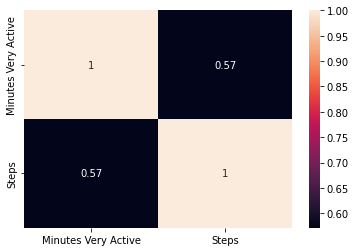

In [17]:
#Calculate the correlation matrix: 

sns.heatmap(corr, annot = True, xticklabels = corr.columns, yticklabels = corr.columns) #Pearson

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

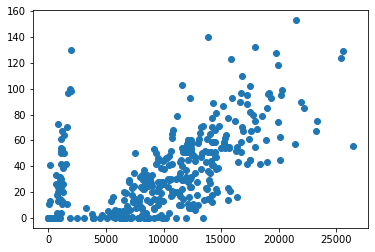

In [18]:
x = fitbit["Steps"]
y = fitbit["Minutes Very Active"]

plt.scatter(x,y)

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
#Accordingly with the graphs it appears to be a correlation between the two variables.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [20]:
x = fitbit["Steps"]
y = fitbit["Minutes Sedentary"]

#Calculate the correlation
corr = fitbit[["Steps", "Minutes Sedentary"]].corr() #pearson
corr

,Steps,Minutes Sedentary
Steps,1.000000,0.076906
Minutes Sedentary,0.076906,1.000000


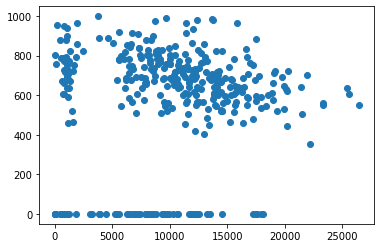

In [21]:
#to create the correlation graph:
plt.scatter(x,y)

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

LinregressResult(slope=0.004052198215822347, intercept=522.9197992014914, rvalue=0.07690608062990098, pvalue=0.14143690593734565, stderr=0.002749764048326206, intercept_stderr=31.790823011774094)
y = a*x + b --> where a = 0.004052198215822347 and b = 522.9197992014914


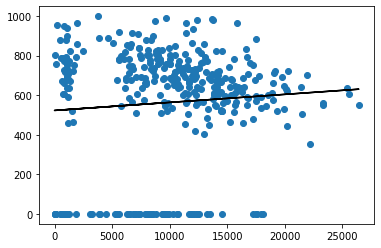

In [24]:
# perform a linear regression of these two variables
results = stats.linregress(x,y)
print(results)

# the slope, the intercept and the r value
print(f'y = a*x + b --> where a = {results[0]} and b = {results[1]}')

regression_line = results[1] + results[0]*x

plt.plot(x, regression_line, c = 'black')
plt.scatter(x, y)
plt.show()

In [25]:
#Accordingly with the graph, the two variables have a linear regression.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [26]:
x = fitbit["Steps"]
y = fitbit["MinutesOfSleep"]

#Calculate the correlation
corr = fitbit[["Steps", "Minutes Sedentary"]].corr() #pearson
corr

,Steps,Minutes Sedentary
Steps,1.000000,0.076906
Minutes Sedentary,0.076906,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

LinregressResult(slope=0.003623043631812987, intercept=253.8086070715639, rvalue=0.13098565950836388, pvalue=0.012018728392518012, stderr=0.0014353089787510333, intercept_stderr=16.594025126795625)
y = a*x + b --> where a = 0.003623043631812987 and b = 253.8086070715639


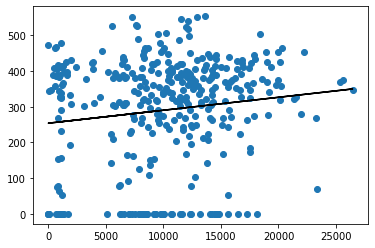

In [27]:
# perform a linear regression of these two variables
results = stats.linregress(x,y)
print(results)

# the slope, the intercept and the r value
print(f'y = a*x + b --> where a = {results[0]} and b = {results[1]}')

regression_line = results[1] + results[0]*x

plt.plot(x, regression_line, c = 'black')
plt.scatter(x, y)
plt.show()

In [28]:
#Accordingly with the graph, the two variables have a linear regression.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [29]:
#Calculate the correlation:
cor_fit = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr() #pearson
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


<AxesSubplot:>

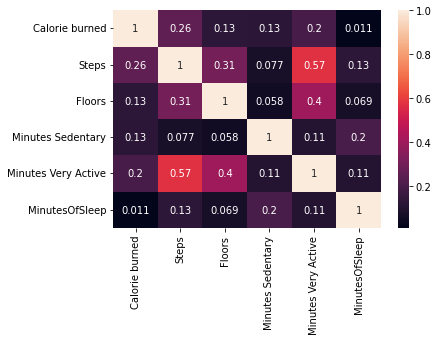

In [30]:
#Calculate the correlation matrix: 

sns.heatmap(cor_fit, annot = True, xticklabels = cor_fit.columns, yticklabels = cor_fit.columns) #Pearson

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [31]:
cor_fit['Steps'].sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [32]:
time_grades = pd.read_csv("C:\\Users\\beatr\\Documents\\Beatriz\\Ironhack\\lab-pivot-table-and-correlation\\your_code\\data\\Time_Grades.csv")
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

array([[<AxesSubplot:title={'center':'Study time'}>,
        <AxesSubplot:title={'center':'Grade'}>]], dtype=object)

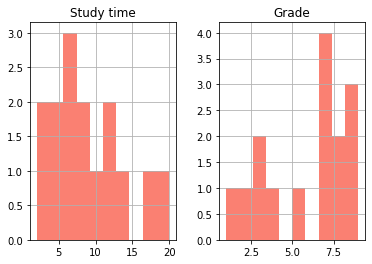

In [34]:
time_grades.hist(color = "salmon")

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [35]:
# Pearson:
time_grades.corr()

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [36]:
#Spearman:
time_grades.corr(method = 'spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [37]:
# There is a strong correlation between both variables: Study Time and Grades (when one increases, the other increases).

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

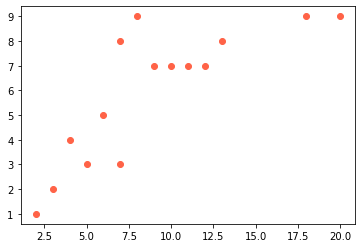

In [38]:
plt.scatter(time_grades['Study time'],time_grades['Grade'], color = "tomato")
plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [39]:
# Pearson correlation evaluates the linear relationship between two continuous variables.
# Spearman correlation evaluates if there is a monotonic relationship between two continuous variables.